In [1]:
### APRP notebook to calculate albedo changes and shortwave feedbacks from CESM single variable timeseries
### Written by: Jennifer Kay (CU), Elizabeth Maroon (NCAR, U.Wisc)
### Last update: November 13, 2019

import numpy as np
import xarray as xr
import glob
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
%matplotlib inline
%autosave 60

import aprp_funcs as aprp

### From https://docs.python.org/3/tutorial/modules.html
##  For efficiency reasons, each module is only imported once per interpreter session. 
## Therefore, if you change your modules, you must restart the interpreter – 
##or, if it’s just one module you want to test interactively, use importlib.reload(), 
##e.g. import importlib; importlib.reload(modulename).
import importlib
importlib.reload(aprp);

Autosaving every 60 seconds


In [2]:
### Specify paths and names for runs
### Code expects single variable timeseries produced by CESM postprocessing scripts.
### The calculations are done on Nyrs_APRP years of data using the start year identified below (*_startyr_APRP).

Nyrs_APRP=45
Ftype='default'; ##'le' or 'default'. Want to use default for non CESM-LE analysis

##1850 control -  (Note: NOT Large Ensemble Directory Organization... so different code!)
cnt_name='b.e21.BW1850.f09_g17.CMIP6-piControl.001'
cnt_path='/glade/collections/cdg/timeseries-cmip6/'+cnt_name+'/atm/proc/tseries/month_1/'
cnt_startyr='0400'     ##note: this is start year for the file as a string
cnt_startyr_APRP=405   ##note: this is the year to start APRP calculations as an integer
    
##1850 Experiment 
exp_name='b.e21.B1850.f09_g17.CMIP6-piControl.001'
exp_path='/glade/collections/cdg/timeseries-cmip6/'+exp_name+'/atm/proc/tseries/month_1/'
exp_startyr='0400'  ##note: this is start year for the file as a string
exp_startyr_APRP=405  ##note: this is the year to start APRP calculations as an integer     

In [3]:
### Read in the data and get inputs for APRP
(ds_cnt,ds_exp,expnames,lon,lat)=aprp.read_data(cnt_name,cnt_path,cnt_startyr,cnt_startyr_APRP, \
                      exp_name,exp_path,exp_startyr,exp_startyr_APRP,Nyrs_APRP,Ftype); 

working on SOLIN


/gpfs/u/apps/dav/opt/python/3.6.4/intel/17.0.1/pkg-library/20180512/lib/python3.6/site-packages/xarray/conventions.py:485: UserWarning: CF decoding is overwriting dtype on variable 'ndbase'
  .format(name))
/gpfs/u/apps/dav/opt/python/3.6.4/intel/17.0.1/pkg-library/20180512/lib/python3.6/site-packages/xarray/conventions.py:485: UserWarning: CF decoding is overwriting dtype on variable 'nsbase'
  .format(name))
/gpfs/u/apps/dav/opt/python/3.6.4/intel/17.0.1/pkg-library/20180512/lib/python3.6/site-packages/xarray/conventions.py:485: UserWarning: CF decoding is overwriting dtype on variable 'nbdate'
  .format(name))
/gpfs/u/apps/dav/opt/python/3.6.4/intel/17.0.1/pkg-library/20180512/lib/python3.6/site-packages/xarray/conventions.py:485: UserWarning: CF decoding is overwriting dtype on variable 'nbsec'
  .format(name))
/gpfs/u/apps/dav/opt/python/3.6.4/intel/17.0.1/pkg-library/20180512/lib/python3.6/site-packages/xarray/conventions.py:485: UserWarning: CF decoding is overwriting dtype on v

(540, 192, 288)
(540, 192, 288)
working on FSDS
(540, 192, 288)
(540, 192, 288)
working on FSDSC
(540, 192, 288)
(540, 192, 288)
working on FSNT
(540, 192, 288)
(540, 192, 288)
working on FSNS
(540, 192, 288)
(540, 192, 288)
working on FSNTC
(540, 192, 288)
(540, 192, 288)
working on FSNSC
(540, 192, 288)
(540, 192, 288)
working on CLDTOT
(540, 192, 288)
(540, 192, 288)
working on TS
(540, 192, 288)
(540, 192, 288)
done reading in data


In [5]:
### Check inputs for APRP (if desired)
#ds_cnt
#ds_exp
#expnames
#lon
#lat

In [6]:
### Run APRP
output=aprp.docalc(ds_cnt,ds_exp,expnames);   

/glade/p/cgd/ppc/duvivier/cesm2_ice/analysis/version_9/aprp/aprp_funcs.py:154: RuntimeWarning: invalid value encountered in true_divide
  planetary_albedo[nn]=swuptoa/swdntoa
/glade/p/cgd/ppc/duvivier/cesm2_ice/analysis/version_9/aprp/aprp_funcs.py:155: RuntimeWarning: invalid value encountered in true_divide
  surface_albedo[nn]=swupsfc/swdnsfc
/glade/p/cgd/ppc/duvivier/cesm2_ice/analysis/version_9/aprp/aprp_funcs.py:99: RuntimeWarning: invalid value encountered in true_divide
  Qsd=swdnsfc/swdntoa
/glade/p/cgd/ppc/duvivier/cesm2_ice/analysis/version_9/aprp/aprp_funcs.py:100: RuntimeWarning: invalid value encountered in true_divide
  alphaplan=swuptoa/swdntoa
/glade/p/cgd/ppc/duvivier/cesm2_ice/analysis/version_9/aprp/aprp_funcs.py:101: RuntimeWarning: invalid value encountered in true_divide
  alphasurf=swupsfc/swdnsfc
/glade/p/cgd/ppc/duvivier/cesm2_ice/analysis/version_9/aprp/aprp_funcs.py:161: RuntimeWarning: invalid value encountered in true_divide
  swdntoaoc=(swdntoa-(1-totcld[

In [7]:
### Check outputs (if desired)
#print(output.keys())
#print(np.shape(output['planetary_albedo']['control']))
#print(np.shape(ds_cnt['SOLIN']))
#print(np.shape(ds_exp['SOLIN']))
#print(np.sum(ds_exp['SOLIN']-ds_cnt['SOLIN']))
#print(ds_exp['SOLIN'][0:12,20,20])
#print(ds_cnt['SOLIN'][0:12,20,20])

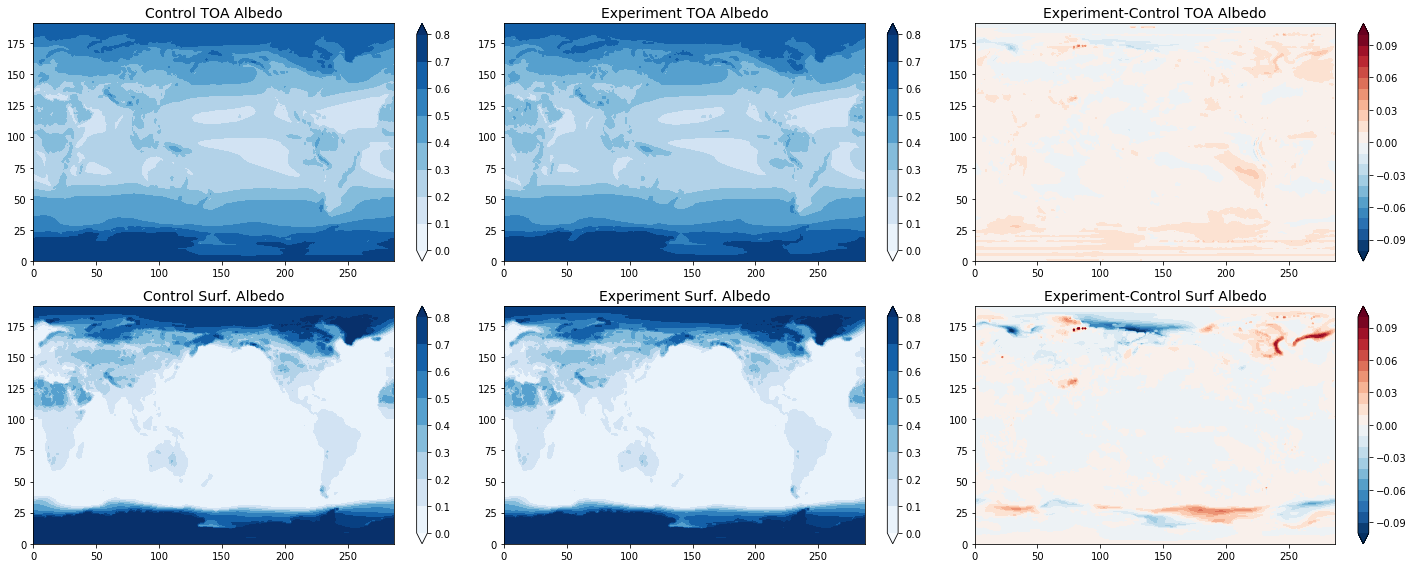

In [8]:
### Plot Planetary(i.e., TOA) and Surface Albedo in the Control, the Experiment, and their Difference
### Note: the TOA albedo is what APRP is going to decompose.
levels=np.arange(0,0.81,0.1)
f=plt.figure(figsize=(20,8));
gs=GridSpec(2,3)
plt.subplot(gs[0,0])
plt.contourf(np.nanmean(output['planetary_albedo']['control'],axis=0),levels,cmap=plt.cm.Blues,extend='both');
plt.colorbar();
plt.title('Control TOA Albedo',fontsize=14);
plt.subplot(gs[0,1])
plt.contourf(np.nanmean(output['planetary_albedo']['experiment'],axis=0),levels,cmap=plt.cm.Blues,extend='both');
plt.colorbar();
plt.title('Experiment TOA Albedo',fontsize=14);
plt.subplot(gs[0,2])
levels2=np.arange(-0.1,0.11,0.01);
plt.contourf(np.nanmean(output['planetary_albedo']['experiment'],axis=0)-\
             np.nanmean(output['planetary_albedo']['control'],axis=0),levels2,cmap=plt.cm.RdBu_r,extend='both');
plt.colorbar();
plt.title('Experiment-Control TOA Albedo',fontsize=14);

plt.subplot(gs[1,0]);
plt.contourf(np.nanmean(output['surface_albedo']['control'],axis=0),levels,cmap=plt.cm.Blues,extend='both');
plt.colorbar();
plt.title('Control Surf. Albedo',fontsize=14);
plt.subplot(gs[1,1]);
plt.contourf(np.nanmean(output['surface_albedo']['experiment'],axis=0),levels,cmap=plt.cm.Blues,extend='both');
plt.colorbar();
plt.title('Experiment Surf. Albedo',fontsize=14);
plt.subplot(gs[1,2]);
levels2=np.arange(-0.1,0.11,0.01);
#levels2=np.arange(-0.3,0.31,0.03);
plt.contourf(np.nanmean(output['surface_albedo']['experiment'],axis=0)-\
             np.nanmean(output['surface_albedo']['control'],axis=0),levels2,cmap=plt.cm.RdBu_r,extend='both');
plt.colorbar();
plt.title('Experiment-Control Surf Albedo',fontsize=14);
plt.tight_layout()

## want to plot as polar stereographic and by month

In [9]:
#### Plot Planetary(i.e., TOA) and Surface Albedo in the Control, the Experiment, and their Difference
#### Note: the TOA albedo is what APRP is going to decompose.
#levels=np.arange(0,0.81,0.1)
#f=plt.figure(figsize=(20,8));
#gs=GridSpec(2,3)
#ax=plt.subplot(gs[0,0],projection=ccrs.NorthPolarStereo())
#plt.pcolormesh(lon,lat,np.nanmean(output['planetary_albedo']['control'],axis=0),cmap=plt.cm.Blues,vmin=0,vmax=0.8,\
#             transform=ccrs.PlateCarree());
#ax.set_extent([-180,180,60,90],ccrs.PlateCarree());
#ax.coastlines();
#plt.colorbar();
#plt.title('Control TOA Albedo',fontsize=14);
#plt.subplot(gs[0,1])
#plt.contourf(np.nanmean(output['planetary_albedo']['experiment'],axis=0),levels,cmap=plt.cm.Blues,extend='both');
#plt.colorbar();
#plt.title('Experiment TOA Albedo',fontsize=14);
#plt.subplot(gs[0,2])
#levels2=np.arange(-0.1,0.11,0.01);
#plt.contourf(np.nanmean(output['planetary_albedo']['experiment'],axis=0)-\
#             np.nanmean(output['planetary_albedo']['control'],axis=0),levels2,cmap=plt.cm.RdBu_r,extend='both');
#plt.colorbar();
#plt.title('Experiment-Control TOA Albedo',fontsize=14);

#plt.subplot(gs[1,0]);
#plt.contourf(np.nanmean(output['surface_albedo']['control'],axis=0),levels,cmap=plt.cm.Blues,extend='both');
#plt.colorbar();
#plt.title('Control Surf. Albedo',fontsize=14);
#plt.subplot(gs[1,1]);
#plt.contourf(np.nanmean(output['surface_albedo']['experiment'],axis=0),levels,cmap=plt.cm.Blues,extend='both');
#plt.colorbar();
#plt.title('Experiment Surf. Albedo',fontsize=14);
#plt.subplot(gs[1,2]);
#levels2=np.arange(-0.1,0.11,0.01);
##levels2=np.arange(-0.3,0.31,0.03);
#plt.contourf(np.nanmean(output['surface_albedo']['experiment'],axis=0)-\
#             np.nanmean(output['surface_albedo']['control'],axis=0),levels2,cmap=plt.cm.RdBu_r,extend='both');
#plt.colorbar();
#plt.title('Experiment-Control Surf Albedo',fontsize=14);
#plt.tight_layout()

## want to plot as polar stereographic and by month

In [10]:
print(np.shape(output['surface_albedo']['experiment']))
output_jan=output['surface_albedo']['experiment'][0::12]
output_feb=output['surface_albedo']['experiment'][1::12]


(540, 192, 288)


In [ ]:
## REMOVED PLOTS OF GAMMA AND MU 

In [11]:
### Calculate total cloud and total non-cloud contributions to TOA albedo
albedo_alpha=np.nanmean(output['albedo_ocsky_alpha'],axis=0)+np.nanmean(output['albedo_clrsky_alpha'],axis=0)
albedo_alpha_0=np.nanmean(output['albedo_ocsky_alpha_0'],axis=0)+np.nanmean(output['albedo_clrsky_alpha_0'],axis=0)

albedo_cld=np.nanmean(output['albedo_cldsky_mu'],axis=0)+np.nanmean(output['albedo_cldsky_gamma'],axis=0)+np.nanmean(output['albedo_cldfrac'],axis=0)
albedo_cld_0=np.nanmean(output['albedo_cldsky_mu_0'],axis=0)+np.nanmean(output['albedo_cldsky_gamma_0'],axis=0)+np.nanmean(output['albedo_cldfrac_0'],axis=0)

albedo_noncld=np.nanmean(output['albedo_clrsky_mu'],axis=0)+np.nanmean(output['albedo_clrsky_gamma'],axis=0)
albedo_noncld_0=np.nanmean(output['albedo_clrsky_mu_0'],axis=0)+np.nanmean(output['albedo_clrsky_gamma_0'],axis=0)

In [12]:
### REMOVED PLOTS FOR SANITY CHECK TO SHOW
### Difference betweeen APRP Partioned Albedo Change and Actual Albedo change
# PURPOSE WAS TO CHECK THAT there is small and random noise in the APRP method...

In [13]:
# Calculate global surface temperature difference
print(ds_exp['TS'].shape)
print(ds_cnt['TS'].shape)

cosw=np.cos(lat*np.pi/180)
#print(cosw)
glocos=np.sum(cosw)
#print(np.shape(cosw),glocos)

glo=np.nansum(np.nanmean(np.nanmean(ds_exp['TS'],axis=0),axis=1)*cosw,axis=0)/glocos- \
    np.nansum(np.nanmean(np.nanmean(ds_cnt['TS'],axis=0),axis=1)*cosw,axis=0)/glocos

print("global mean difference (K)",np.round(glo,2))

## this is small, which is good, and 

(540, 192, 288)
(540, 192, 288)
global mean difference (K) -0.07


In [14]:
### Calculate partitioned shortwave feedbacks from APRP
albedo_alpha=-1*(np.nanmean(output['albedo_ocsky_alpha']*ds_exp['SOLIN'],axis=0)+\
                 np.nanmean(output['albedo_clrsky_alpha']*ds_exp['SOLIN'],axis=0))
albedo_alpha_0=-1*(np.nanmean(output['albedo_ocsky_alpha_0']*ds_cnt['SOLIN'],axis=0)+\
                   np.nanmean(output['albedo_clrsky_alpha_0']*ds_cnt['SOLIN'],axis=0))

albedo_cld=-1*(np.nanmean(output['albedo_cldsky_mu']*ds_exp['SOLIN'],axis=0)+\
               np.nanmean(output['albedo_cldsky_gamma']*ds_exp['SOLIN'],axis=0)+\
               np.nanmean(output['albedo_cldfrac']*ds_exp['SOLIN'],axis=0))
albedo_cld_0=-1*(np.nanmean(output['albedo_cldsky_mu_0']*ds_exp['SOLIN'],axis=0)+\
                 np.nanmean(output['albedo_cldsky_gamma_0']*ds_exp['SOLIN'],axis=0)+\
                 np.nanmean(output['albedo_cldfrac_0']*ds_cnt['SOLIN'],axis=0))

albedo_noncld=-1*(np.nanmean(output['albedo_clrsky_mu']*ds_exp['SOLIN'],axis=0)+\
                  np.nanmean(output['albedo_clrsky_gamma']*ds_exp['SOLIN'],axis=0))
albedo_noncld_0=-1*(np.nanmean(output['albedo_clrsky_mu_0']*ds_exp['SOLIN'],axis=0)+\
                    np.nanmean(output['albedo_clrsky_gamma_0']*ds_exp['SOLIN'],axis=0))

# Just look at difference in shortwave feedbacks (i.e. don't divide by temperature difference so units stay W/m2)
# these are experiment - control
SWfeedback_surf=(albedo_alpha-albedo_alpha_0)   
SWfeedback_cld=(albedo_cld-albedo_cld_0)
SWfeedback_noncld=(albedo_noncld-albedo_noncld_0)

SWfeedback_tot=-1*(np.nanmean(output['planetary_albedo']['experiment']*ds_exp['SOLIN'],axis=0)-\
             np.nanmean(output['planetary_albedo']['control']*ds_cnt['SOLIN'],axis=0))
## Here is where I want to keep it monthly, not average it

In [15]:
#checking shape - these are nlat x nlon
print(np.shape(albedo_alpha))
print(np.shape(albedo_cld))
print(np.shape(SWfeedback_surf))

(192, 288)
(192, 288)
(192, 288)


In [16]:
### Calculate partitioned shortwave feedbacks from APRP - but keep monthly!
monthly_albedo_alpha=-1*(output['albedo_ocsky_alpha']*ds_exp['SOLIN']+\
                 output['albedo_clrsky_alpha']*ds_exp['SOLIN'])
monthly_albedo_alpha_0=-1*(output['albedo_ocsky_alpha_0']*ds_cnt['SOLIN']+\
                   output['albedo_clrsky_alpha_0']*ds_cnt['SOLIN'])

monthly_albedo_cld=-1*(output['albedo_cldsky_mu']*ds_exp['SOLIN']+\
               output['albedo_cldsky_gamma']*ds_exp['SOLIN']+\
               output['albedo_cldfrac']*ds_exp['SOLIN'])
monthly_albedo_cld_0=-1*(output['albedo_cldsky_mu_0']*ds_exp['SOLIN']+\
                 output['albedo_cldsky_gamma_0']*ds_exp['SOLIN']+\
                 output['albedo_cldfrac_0']*ds_cnt['SOLIN'])

monthly_albedo_noncld=-1*(output['albedo_clrsky_mu']*ds_exp['SOLIN']+\
                  output['albedo_clrsky_gamma']*ds_exp['SOLIN'])
monthly_albedo_noncld_0=-1*(output['albedo_clrsky_mu_0']*ds_exp['SOLIN']+\
                    output['albedo_clrsky_gamma_0']*ds_exp['SOLIN'])

# Just look at difference in shortwave feedbacks (i.e. don't divide by temperature difference so units stay W/m2)
# these are experiment - control
monthly_SWfeedback_surf=(monthly_albedo_alpha-monthly_albedo_alpha_0)   
monthly_SWfeedback_cld=(monthly_albedo_cld-monthly_albedo_cld_0)
monthly_SWfeedback_noncld=(monthly_albedo_noncld-monthly_albedo_noncld_0)

monthly_SWfeedback_tot=-1*(output['planetary_albedo']['experiment']*ds_exp['SOLIN']-\
             output['planetary_albedo']['control']*ds_cnt['SOLIN'])

In [17]:
#checking shape - these are nlat x nlon
print(np.shape(monthly_albedo_alpha))
print(np.shape(monthly_albedo_cld))
print(np.shape(monthly_SWfeedback_surf))

(540, 192, 288)
(540, 192, 288)
(540, 192, 288)


In [18]:
### Calculate and Print Global Means
print('Difference (exp-ctrl) in feedbacks with units of W/m2')
cos_lat=np.cos(lat*np.pi/180)
glo_SWfeedback=np.nansum(np.nanmean(SWfeedback_tot,axis=1)*cos_lat)/np.nansum(cos_lat)
print('Global Shortwave Feedback:',np.round(glo_SWfeedback,2))
glo_SWfeedback_surf=np.nansum(np.nanmean(SWfeedback_surf,axis=1)*cos_lat)/np.nansum(cos_lat)
print('Global Surface Shortwave Feedback:', np.round(glo_SWfeedback_surf,2))
glo_SWfeedback_cld=np.nansum(np.nanmean(SWfeedback_cld,axis=1)*cos_lat)/np.nansum(cos_lat)
print('Global Cloud Shortwave Feedback:', np.round(glo_SWfeedback_cld,2))
glo_SWfeedback_noncld=np.nansum(np.nanmean(SWfeedback_noncld,axis=1)*cos_lat)/np.nansum(cos_lat)
print('Global Non-cloud Shortwave Feedback', np.round(glo_SWfeedback_noncld,2))

# Main take-away here is that there are small differences in the surface shortwave feedback 
# and bigger differences in cloud shortwave feedback. Supports that there is a true difference
# in clouds between experiments. But this is just global. May be even bigger/smaller in Arctic or by season/month
# Note that the feedbacks on their own are all negative

## In addition to global means, I want to look at means just from 70-90N

Difference (exp-ctrl) in feedbacks with units of W/m2
Global Shortwave Feedback: -1.01
Global Surface Shortwave Feedback: 0.04
Global Cloud Shortwave Feedback: 1.03
Global Non-cloud Shortwave Feedback -2.08


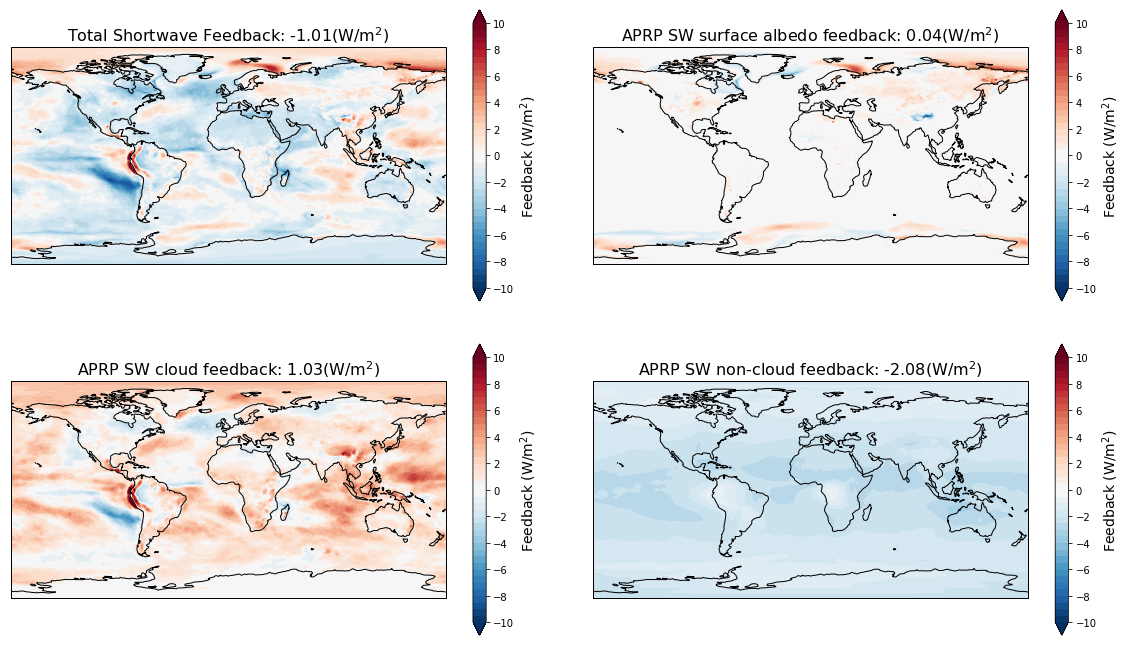

In [19]:
### Plot Shortwave feedbacks
# these are difference: experiment - control
levels=np.arange(40,361,20)

gs=GridSpec(2,2)
f=plt.figure(figsize=(16,10))
maxx=10
delt=0.5
onelev=np.arange(-1*maxx,0,delt)
twolev=np.arange(delt,maxx+delt,delt)
levels2=np.concatenate((onelev,twolev))
ticklevs2=np.arange(-1*maxx,maxx+delt,4*delt)

ax=plt.subplot(gs[0,0],projection=ccrs.PlateCarree())
data_cyc,lon_cyc=add_cyclic_point(SWfeedback_tot,coord=lon)
plt.contourf(lon_cyc,lat,data_cyc,levels2,cmap=plt.cm.RdBu_r,extend='both',transform=ccrs.PlateCarree())
ax.coastlines()
cb=plt.colorbar(ticks=ticklevs2,spacing='proportional',shrink=0.8)
plt.title('Total Shortwave Feedback: '+np.str(np.round(glo_SWfeedback,2))+'(W/m$^{2}$)',fontsize=16)
cb.set_label('Feedback (W/m$^{2}$)',fontsize=14)

ax=plt.subplot(gs[0,1],projection=ccrs.PlateCarree())
data_cyc,lon_cyc=add_cyclic_point(SWfeedback_surf,coord=lon)
plt.contourf(lon_cyc,lat,data_cyc,levels2,cmap=plt.cm.RdBu_r,extend='both',transform=ccrs.PlateCarree())
plt.title('APRP SW surface albedo feedback: '+np.str(np.round(glo_SWfeedback_surf,2))+'(W/m$^{2}$)',fontsize=16)
ax.coastlines()
cb=plt.colorbar(ticks=ticklevs2,spacing='proportional',shrink=0.8)
cb.set_label('Feedback (W/m$^{2}$)',fontsize=14)

ax=plt.subplot(gs[1,0],projection=ccrs.PlateCarree())
data_cyc,lon_cyc=add_cyclic_point(SWfeedback_cld,coord=lon)
plt.contourf(lon_cyc,lat,data_cyc,levels2,cmap=plt.cm.RdBu_r,extend='both',transform=ccrs.PlateCarree())
plt.title('APRP SW cloud feedback: '+np.str(np.round(glo_SWfeedback_cld,2))+'(W/m$^{2}$)',fontsize=16)
ax.coastlines()
cb=plt.colorbar(ticks=ticklevs2,spacing='proportional',shrink=0.8)
cb.set_label('Feedback (W/m$^{2}$)',fontsize=14)

ax=plt.subplot(gs[1,1],projection=ccrs.PlateCarree())
data_cyc,lon_cyc=add_cyclic_point(SWfeedback_noncld,coord=lon)
plt.contourf(lon_cyc,lat,data_cyc,levels2,cmap=plt.cm.RdBu_r,extend='both',transform=ccrs.PlateCarree())
plt.title('APRP SW non-cloud feedback: '+np.str(np.round(glo_SWfeedback_noncld,2))+'(W/m$^{2}$)',fontsize=16)
ax.coastlines()
cb=plt.colorbar(ticks=ticklevs2,spacing='proportional',shrink=0.8)
cb.set_label('Feedback (W/m$^{2}$)',fontsize=14)

plt.tight_layout()
# How to save the figure!!
#plt.savefig('figureX_gmaps_APRPcloudfeedback'+exp_name+'.pdf', dpi=1200, format='pdf')

# Take away, when we look regionally, there are bigger differences in the feedback differences 
# in the Arctic in particular
## want to also plot as polar stereographic and by month with the total mean from 70-90N

In [20]:
### Calculate Zonal Means
cos_lat=np.cos(lat*np.pi/180)
zm_SWfeedback=np.nanmean(SWfeedback_tot,axis=1)
zm_SWfeedback_surf=np.nanmean(SWfeedback_surf,axis=1)
zm_SWfeedback_cld=np.nanmean(SWfeedback_cld,axis=1)
zm_SWfeedback_noncld=np.nanmean(SWfeedback_noncld,axis=1)
#print(zm_SWfeedback.shape)

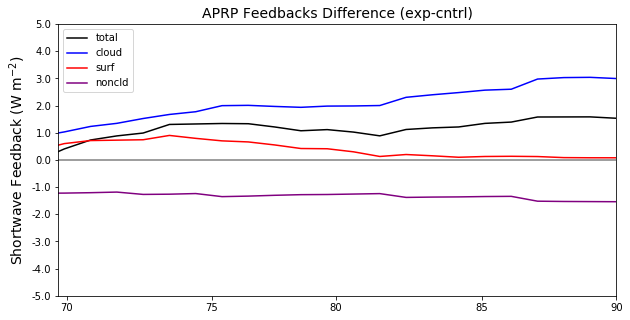

In [21]:
### Plot Zonal Means
# these are difference: experiment - control
lats = 90*np.sin(np.radians(lat))
ticksx = [lats[150],lats[156],lats[162],lats[171],lats[191]]
xlab = [70,75,80,85,90]
ticksy = [-5.,-4.,-3.,-2.,-1.,0.,1.,2.,3.,4.,5.]
ylab = [-5.,-4.,-3.,-2.,-1.,0.,1.,2.,3.,4.,5.]

plt.figure(figsize = (10,5))
zero = np.zeros(len(lat));
plt.plot(lat,zero, 'grey', 'k');
plt.plot(lat, zm_SWfeedback, 'black', label ='total');
plt.plot(lat, zm_SWfeedback_cld, 'blue', label ='cloud');
plt.plot(lat, zm_SWfeedback_surf, 'red', label ='surf');
plt.plot(lat, zm_SWfeedback_noncld, 'purple', label ='noncld');
plt.xticks(ticksx,xlab);
plt.yticks(ticksy,ylab);
plt.legend()
plt.ylabel('Shortwave Feedback (W m$^{-2}$)',fontsize=14);
plt.title("APRP Feedbacks Difference (exp-cntrl)",fontsize=14);
plt.xlim([70,90]);
plt.ylim([-5,5]);
#plt.savefig('figureX_zmean_APRPcloudfeedback'+exp_name+'.pdf', dpi=1200, format='pdf')

# Takeaway here, zonally the cloud feedbacks dominate the annual average differences

In [22]:
print(np.size(lats))
print(lats[130])
print(lats[130:191])
print(np.size(zm_SWfeedback))

192
48.374303753447656
[48.37430375 49.61602129 50.84431596 52.05885547 53.25931125 54.44535853
 55.61667644 56.7729481  57.9138607  59.03910558 60.14837833 61.24137884
 62.31781143 63.37738488 64.41981253 65.44481239 66.45210714 67.44142427
 68.41249616 69.36506007 70.29885833 71.21363829 72.10915248 72.98515863
 73.84141975 74.6777042  75.49378572 76.28944354 77.06446241 77.81863266
 78.55175025 79.26361686 79.9540399  80.62283258 81.26981398 81.89480906
 82.49764874 83.07816993 83.63621559 84.17163473 84.6842825  85.17402023
 85.64071542 86.08424181 86.50447942 86.90131454 87.27463984 87.6243543
 87.95036332 88.2525787  88.53091868 88.78530797 89.01567773 89.22196565
 89.40411592 89.56207926 89.69581294 89.80528077 89.89045315 89.95130702
 89.98782593]
192


In [23]:
print(np.size(output['surface_albedo']['experiment']))

29859840


In [25]:
### Save to netcdf with coordinate arrays
outpath='/glade/p/cgd/ppc/duvivier/cesm2_ice/analysis/version_9/aprp/'

## 2=3d data (time,lat,lon)
data_vars={'monthly_SWfeedback_tot': (['time','lat','lon'],  monthly_SWfeedback_tot,{'units': 'Wm-2'}),\
          'monthly_SWfeedback_surface': (['time','lat','lon'],  monthly_SWfeedback_surf,{'units': 'Wm-2'}),\
          'monthly_SWfeedback_cloud': (['time','lat','lon'],  monthly_SWfeedback_cld,{'units': 'Wm-2'}),\
          'monthly_SWfeedback_noncloud': (['time','lat','lon'],  monthly_SWfeedback_noncld,{'units': 'Wm-2'}),\
          }
ds = xr.Dataset(data_vars,coords={'time':(['time'],np.arange(1,np.shape(monthly_SWfeedback_tot)[0]+1,1)),'lat':(['lat'],lat),'lon':(['lon'],lon)})
ds.attrs['control']=cnt_name
ds.attrs['experiment']=exp_name
ds.attrs['Global_Surface_Temperature_Difference']=str('%.02f'%glo)+" K"
fname=outpath+'APRP_CMIP6_styr_'+cnt_startyr+'_diffs_monthly.nc'
ds.to_netcdf(fname)

## 2d data (lat,lon)
data_vars={'SWfeedback_tot': (['lat','lon'],  SWfeedback_tot,{'units': 'Wm-2'}),\
          'SWfeedback_surface': (['lat','lon'],  SWfeedback_surf,{'units': 'Wm-2'}),\
          'SWfeedback_cloud': (['lat','lon'],  SWfeedback_cld,{'units': 'Wm-2'}),\
          'SWfeedback_noncloud': (['lat','lon'],  SWfeedback_noncld,{'units': 'Wm-2'}),\
          }
ds = xr.Dataset(data_vars,coords={'lat':(['lat'],lat),'lon':(['lon'],lon)})
ds.attrs['control']=cnt_name
ds.attrs['experiment']=exp_name
ds.attrs['surface_temperature_normalization_method']='globalmean'
ds.attrs['Global_Surface_Temperature_Change']=str('%.02f'%glo)+" K"
fname=outpath+'APRP_CMIP6_styr_'+cnt_startyr+'_diffs_annual.nc'
ds.to_netcdf(fname)

## 1d data (lat)
data_vars={'SWfeedback_tot': (['lat'],  zm_SWfeedback,{'units': 'Wm-2-K'}),\
          'SWfeedback_surface': (['lat'],  zm_SWfeedback_surf,{'units': 'Wm-2-K'}),\
          'SWfeedback_cloud': (['lat'],  zm_SWfeedback_cld,{'units': 'Wm-2-K'}),\
          'SWfeedback_noncloud': (['lat'],  zm_SWfeedback_noncld,{'units': 'Wm-2-K'}),\
          }
ds = xr.Dataset(data_vars,coords={'lat':(['lat'],lat),'lon':(['lon'],lon)})
ds.attrs['control']=cnt_name
ds.attrs['experiment']=exp_name
ds.attrs['surface_temperature_normalization_method']='globalmean'
ds.attrs['Global_Surface_Temperature_Change']=str('%.02f'%glo)+" K"
fname=outpath+'APRP_CMIP6_styr_'+cnt_startyr+'_diffs_zonal.nc'
ds.to_netcdf(fname)